In [47]:
# dataset from : https://www.kaggle.com/datasets/gauravduttakiit/sensorfusion-smoke-detection-classification/data?select=train_dataset.csv

#KEEP IN MIND: dataset is for fire alarms (indoor), likely, we need to obtain more accutate data for wildfires...

import pandas as pd
smoke = pd.read_csv('train_dataset.csv')
smoke.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1655127646,15.127,42.98,199,426,12775,20524,937.420,1.55,1.61,10.66,1.663,0.038,3338,0
1,1654734418,27.107,54.80,0,400,13058,19961,939.799,0.21,0.22,1.46,0.228,0.005,1087,0
2,1654714047,26.370,45.80,144,409,12784,20580,937.376,1.97,2.05,13.59,2.118,0.048,1860,0
3,1654715196,25.980,48.42,180,431,12771,20537,937.333,1.93,2.01,13.31,2.075,0.047,3009,0
4,1655125243,-1.197,41.36,76,400,12791,20673,937.556,1.90,1.97,13.08,2.040,0.046,935,0


<ipython-input-26-4ad2e3669dee>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  counts = pd.value_counts(smoke['Fire Alarm'])


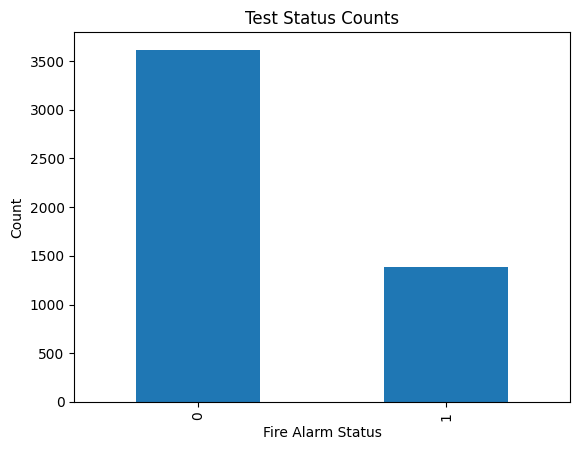

In [26]:
import matplotlib.pyplot as plt
counts = pd.value_counts(smoke['Fire Alarm'])

counts.plot(kind='bar')
plt.xlabel('Fire Alarm Status')
plt.ylabel('Count')
plt.title('Test Status Counts')
plt.show()

In [28]:
from sklearn.utils import resample

df_majority = smoke[smoke['Fire Alarm'] == False]
df_minority = smoke[smoke['Fire Alarm'] == True]

df_majority_downsampled = resample(df_majority,
                                     replace=False,
                                     n_samples=1000,
                                     random_state=42)
df_minority_downsampled = resample(df_minority,
                                     replace=False,
                                     n_samples=1000,
                                     random_state=42)


# Combine minority class with downsampled majority class
balanced_df = pd.concat([df_majority_downsampled, df_minority_downsampled])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

<ipython-input-29-f5e66b6ce77a>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  counts = pd.value_counts(balanced_df['Fire Alarm'])


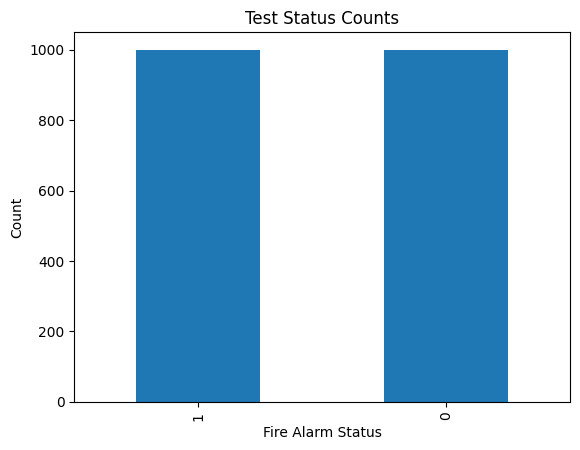

In [29]:
import matplotlib.pyplot as plt
counts = pd.value_counts(balanced_df['Fire Alarm'])
counts.plot(kind='bar')
plt.xlabel('Fire Alarm Status')
plt.ylabel('Count')
plt.title('Test Status Counts')
plt.show()

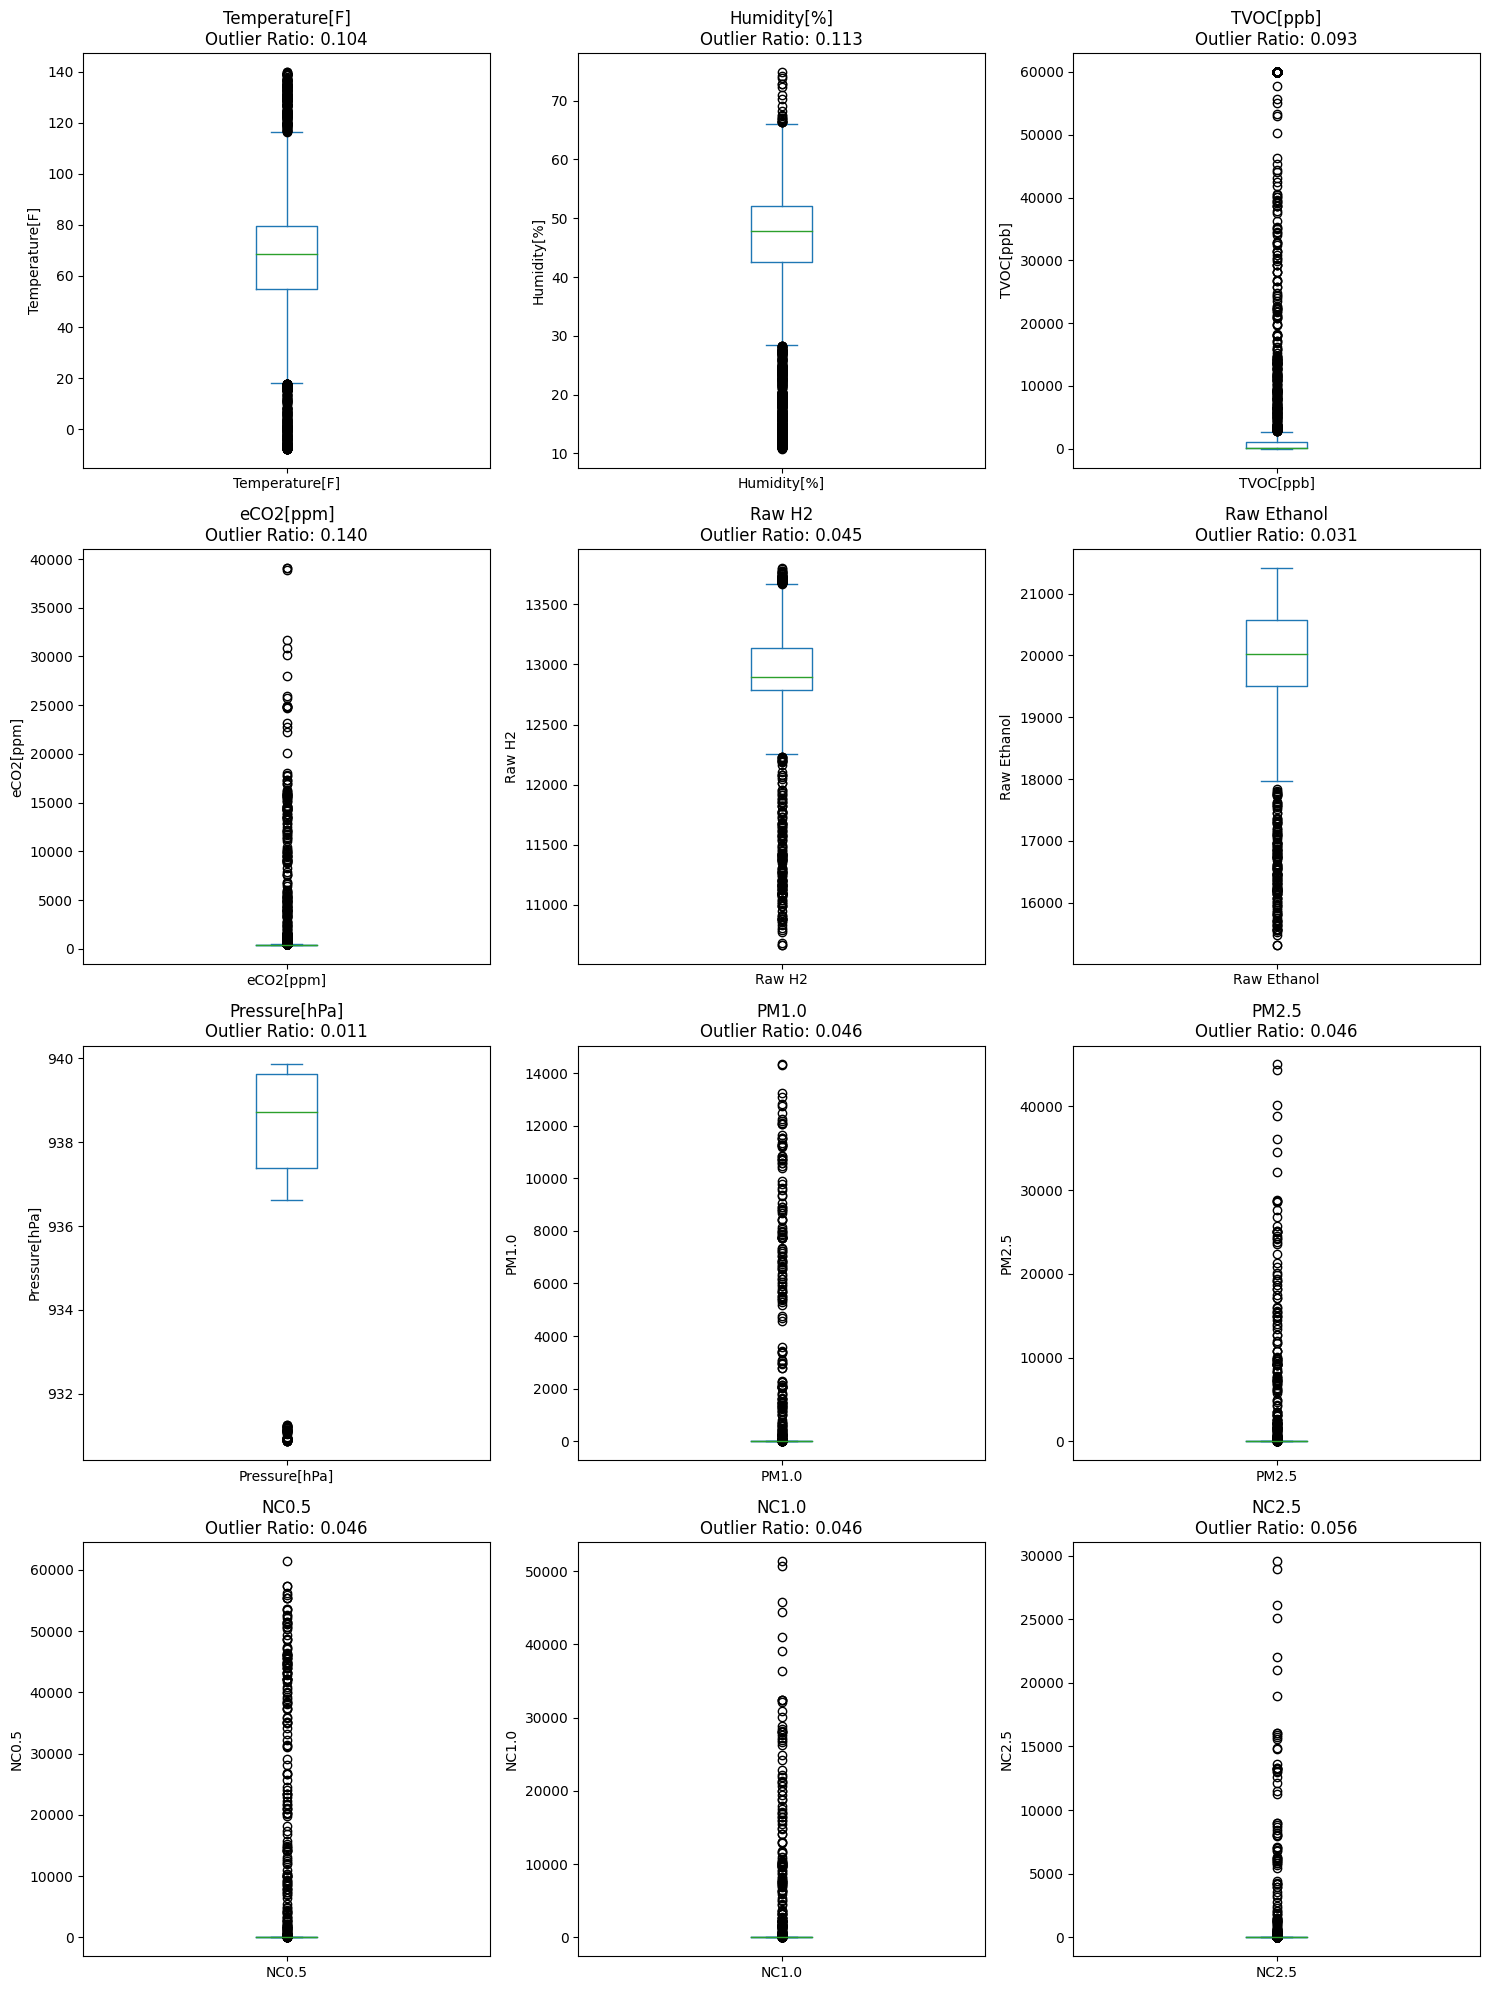

In [33]:
import matplotlib.pyplot as plt
import numpy as np

if 'Temperature[C]' in smoke.columns:
    smoke['Temperature[F]'] = (smoke['Temperature[C]'] * 9/5) + 32

def plot_box_with_outlier_ratio(data, column, ax=None):
    # Calculate quartiles and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outlier_ratio = len(outliers) / len(data[column])

    # Create box plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    data[column].plot(kind='box', ax=ax)
    ax.set_title(f'{column}\nOutlier Ratio: {outlier_ratio:.3f}')
    ax.set_ylabel(column)

    return ax

# Create subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
axs = axs.ravel()

# List of columns to plot (including the new Fahrenheit temperature column)
columns = ['Temperature[F]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
           'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0',
           'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']

# Create box plots with outlier ratios
for i, column in enumerate(columns):
    plot_box_with_outlier_ratio(smoke, column, ax=axs[i])

plt.tight_layout()
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = balanced_df['Fire Alarm']
X = balanced_df.drop(columns=['Fire Alarm'])

X_scaled = scaler.fit_transform(X.to_numpy())
X_scaled = pd.DataFrame(X_scaled, columns=[X.columns.tolist()])

<ipython-input-48-240fccd9f8c0>:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled = X_scaled.drop(columns=['CNT', 'UTC'], errors='ignore')
<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: Humidity[%]
Accuracy: 0.985
Precision Score: 0.9900497512437811
Recall Score: 0.9802955665024631
F1 Score: 0.9851485148514851
AUC=0.99


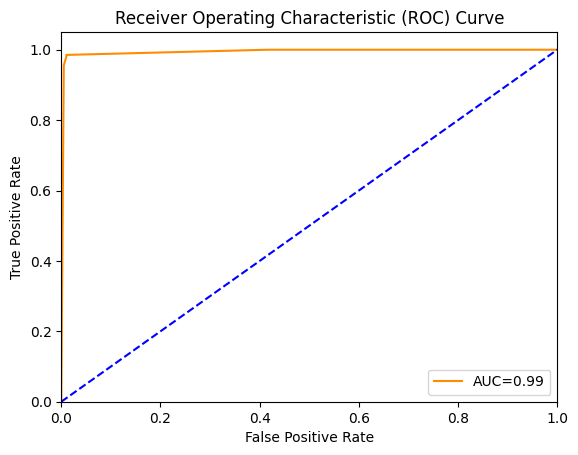

<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: TVOC[ppb]
Accuracy: 0.9575
Precision Score: 0.9946808510638298
Recall Score: 0.9211822660098522
F1 Score: 0.9565217391304348
AUC=0.98


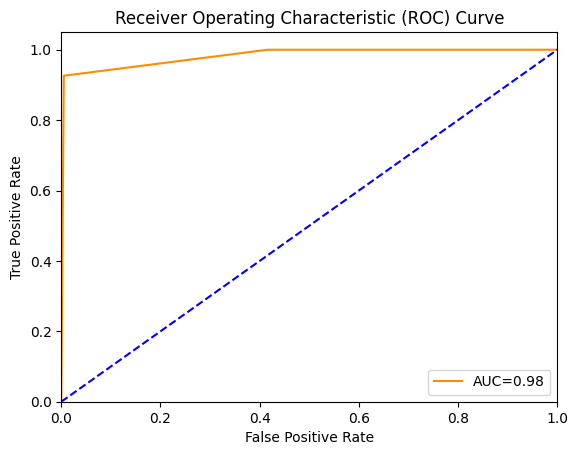

<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: eCO2[ppm]
Accuracy: 0.985
Precision Score: 0.9900497512437811
Recall Score: 0.9802955665024631
F1 Score: 0.9851485148514851
AUC=0.99


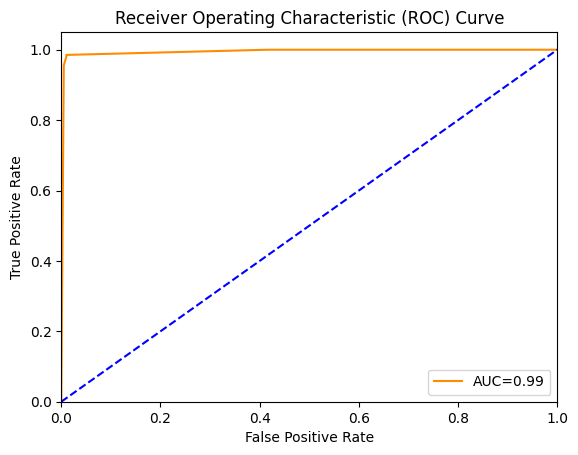

<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: Raw H2
Accuracy: 0.985
Precision Score: 0.9900497512437811
Recall Score: 0.9802955665024631
F1 Score: 0.9851485148514851
AUC=0.99


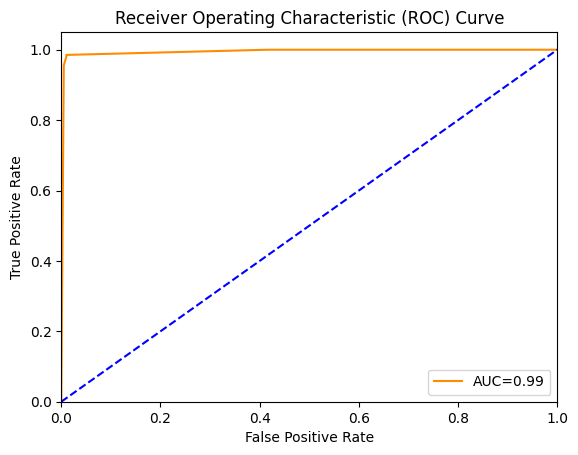

<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: Raw Ethanol
Accuracy: 0.985
Precision Score: 0.9900497512437811
Recall Score: 0.9802955665024631
F1 Score: 0.9851485148514851
AUC=0.99


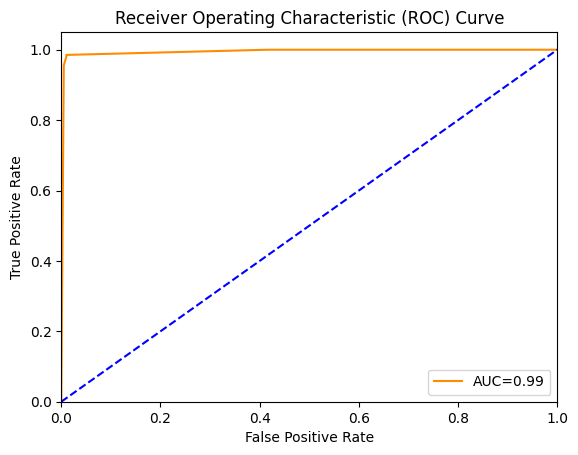

<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: Pressure[hPa]
Accuracy: 0.9575
Precision Score: 0.9305555555555556
Recall Score: 0.9901477832512315
F1 Score: 0.9594272076372315
AUC=0.99


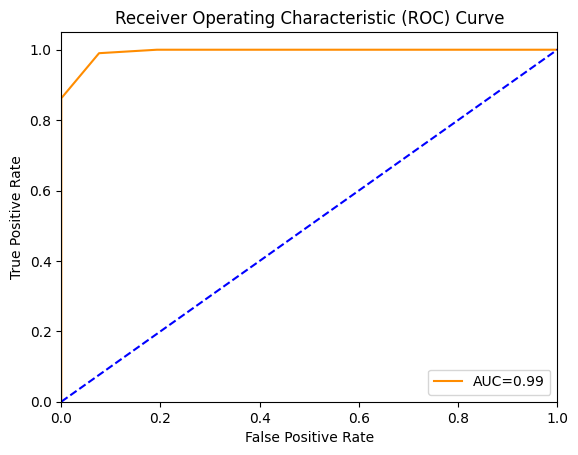

<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: PM1.0
Accuracy: 0.985
Precision Score: 0.9900497512437811
Recall Score: 0.9802955665024631
F1 Score: 0.9851485148514851
AUC=0.99


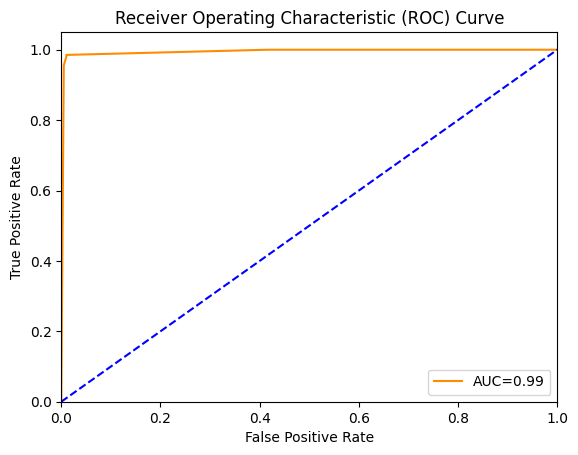

<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: PM2.5
Accuracy: 0.985
Precision Score: 0.9900497512437811
Recall Score: 0.9802955665024631
F1 Score: 0.9851485148514851
AUC=0.99


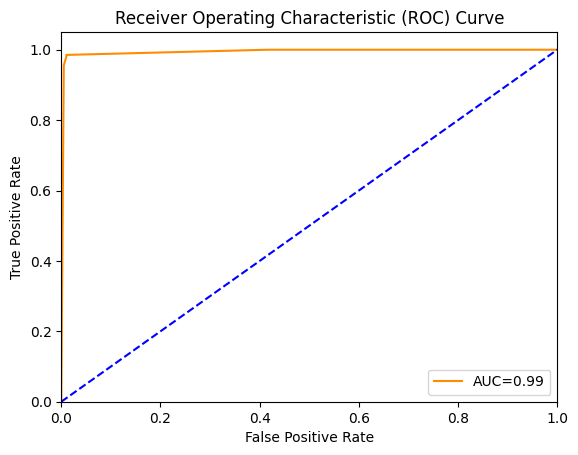

<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: NC0.5
Accuracy: 0.985
Precision Score: 0.9900497512437811
Recall Score: 0.9802955665024631
F1 Score: 0.9851485148514851
AUC=0.99


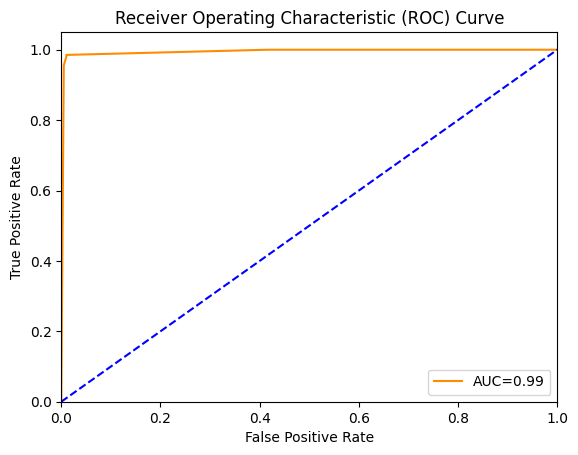

<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: NC1.0
Accuracy: 0.985
Precision Score: 0.9900497512437811
Recall Score: 0.9802955665024631
F1 Score: 0.9851485148514851
AUC=0.99


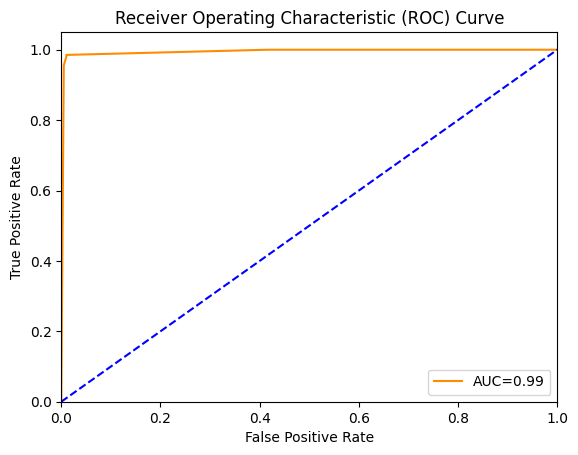

<ipython-input-48-240fccd9f8c0>:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_scaled_temp = X_scaled.drop(columns=[column])


Excluding: NC2.5
Accuracy: 0.985
Precision Score: 0.9900497512437811
Recall Score: 0.9802955665024631
F1 Score: 0.9851485148514851
AUC=0.99


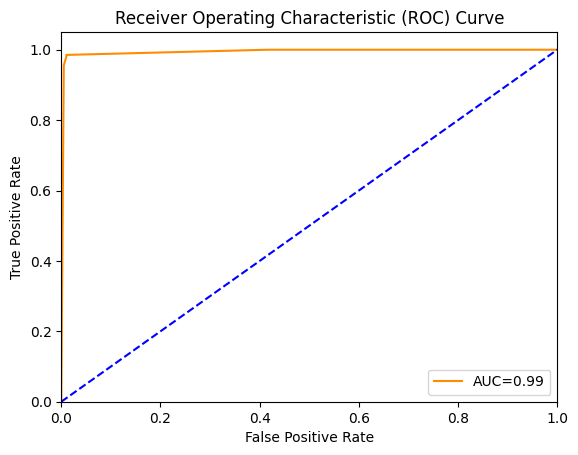

In [48]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# List of columns to exclude from training (including CNT and UTC)
columns_to_exclude = ['Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
                       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0',
                       'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']

# Ensure CNT and UTC columns are excluded from the dataset
X_scaled = X_scaled.drop(columns=['CNT', 'UTC'], errors='ignore')

# Iterate through the columns to exclude for the training process
for column in columns_to_exclude:
    # Create a copy of the scaled dataset and drop the specified column
    X_scaled_temp = X_scaled.drop(columns=[column])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_temp, y, test_size=0.2, random_state=42)

    # Create the Decision Tree Classifier model
    clf = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)

    # Train and fit the Decision Tree Classifier
    clf.fit(X_train, y_train)

    # Predict the response for the test dataset
    dtree_y_pred = clf.predict(X_test)

    # Evaluate the predictions
    accuracy = metrics.accuracy_score(y_test, dtree_y_pred)
    precision = metrics.precision_score(y_test, dtree_y_pred)
    recall = metrics.recall_score(y_test, dtree_y_pred)
    f1_score = metrics.f1_score(y_test, dtree_y_pred)

    # Print the evaluation metrics for the current column exclusion
    print(f"Excluding: {column}")
    print("Accuracy:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1 Score:", f1_score)

    # Get predicted probabilities for the positive class
    dtree_probs = clf.predict_proba(X_test)[:, 1]

    # Function to plot the ROC curve
    def plot_roc(dt_y_true, dt_probs):
        dtree_fpr, dtree_tpr, threshold = roc_curve(dt_y_true, dt_probs)
        dtree_auc_val = auc(dtree_fpr, dtree_tpr)

        print('AUC=%0.2f' % dtree_auc_val)

        # Plot the ROC curve
        plt.plot(dtree_fpr, dtree_tpr, label='AUC=%0.2f' % dtree_auc_val, color='darkorange')
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'b--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.show()

        return dtree_auc_val

    # Plot the ROC curve
    dtree_auc = plot_roc(y_test, dtree_probs)

In [49]:
# After fitting the model
importances = clf.feature_importances_
feature_names = X_scaled_temp.columns

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)

              Feature  Importance
6    (Pressure[hPa],)    0.469372
2        (TVOC[ppb],)    0.363346
7            (PM1.0,)    0.161235
0   (Temperature[C],)    0.006046
1      (Humidity[%],)    0.000000
3        (eCO2[ppm],)    0.000000
4           (Raw H2,)    0.000000
5      (Raw Ethanol,)    0.000000
8            (PM2.5,)    0.000000
9            (NC0.5,)    0.000000
10           (NC1.0,)    0.000000


Accuracy: 0.995
Precision Score: 0.9950738916256158
Recall Score: 0.9950738916256158
F1 Score: 0.9950738916256158
AUC=1.00


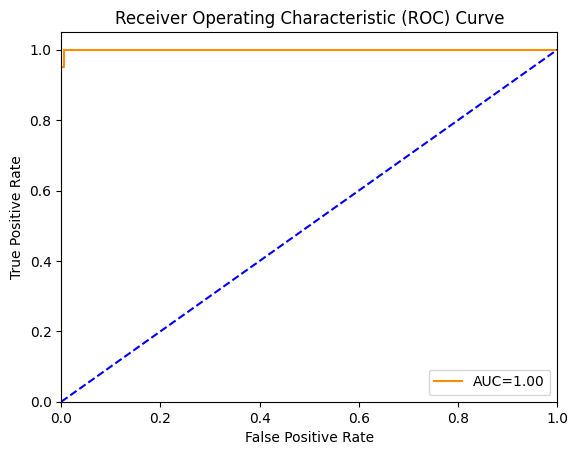

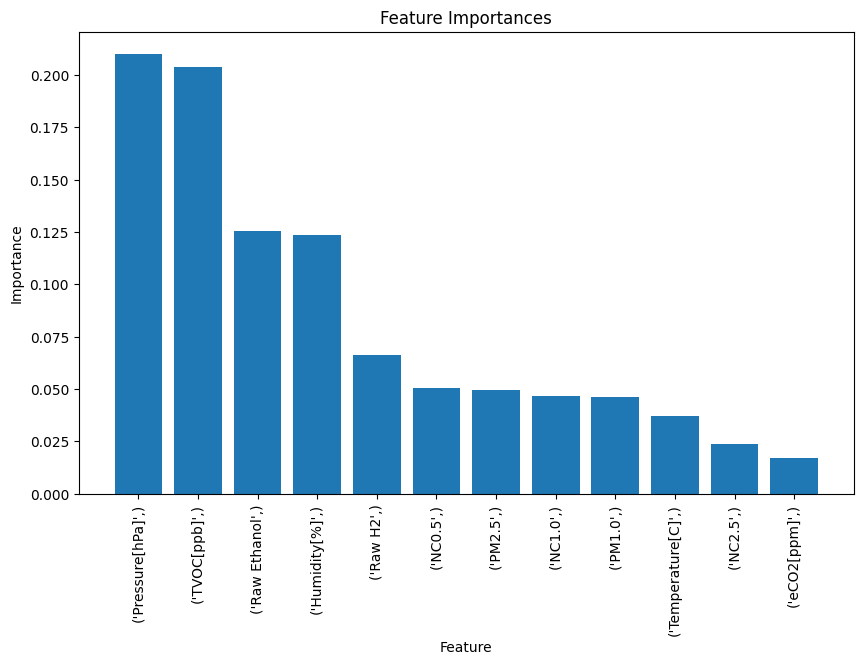

In [51]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Ensure that CNT and UTC columns are excluded from the dataset
X_scaled_temp = X_scaled.drop(columns=['CNT', 'UTC'], errors='ignore')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_temp, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier with specified parameters
rf_clf = RandomForestClassifier(
    n_estimators=500,            # Number of trees in the forest
    min_samples_split=5,         # Minimum number of samples required to split an internal node
    min_samples_leaf=1,          # Minimum number of samples required to be at a leaf node
    max_depth=None,              # Maximum depth of the tree (None means nodes are expanded until all leaves are pure)
    criterion='entropy',         # Measure of quality for split
    bootstrap=True,              # Whether bootstrap samples are used when building trees
    random_state=42              # Ensures reproducibility
)

# Fit the Random Forest Classifier on the training data
rf_clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = rf_clf.predict(X_test)

# True labels for the test set
rf_y_true = y_test

# Evaluate predictions using various metrics
accuracy = metrics.accuracy_score(rf_y_true, y_pred)
precision = metrics.precision_score(rf_y_true, y_pred)
recall = metrics.recall_score(rf_y_true, y_pred)
f1_score = metrics.f1_score(rf_y_true, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1_score)

# Get predicted probabilities for the positive class
rf_probs = rf_clf.predict_proba(X_test)[:, 1]  # This gives the probabilities for the positive class

# Function to plot the ROC curve
def plot_roc(rf_y_true, rf_probs):
    rf_fpr, rf_tpr, threshold = roc_curve(rf_y_true, rf_probs)
    rf_auc_val = auc(rf_fpr, rf_tpr)

    print('AUC=%0.2f' % rf_auc_val)

    # Plot the ROC curve
    plt.plot(rf_fpr, rf_tpr, label='AUC=%0.2f' % rf_auc_val, color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'b--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

    return rf_auc_val

# Plot the ROC curve
rf_auc = plot_roc(rf_y_true, rf_probs)

# Plot feature importances
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]  # Sort feature importances in descending order

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X_scaled_temp.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_scaled_temp.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X_scaled_temp.shape[1]])
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()

# Call the function to plot feature importances
plot_feature_importance(rf_clf, X_scaled_temp.columns)

Above has way higher distrubution between data points and their importance.